# Importando dataset

In [1]:
import pandas as pd

arquivo_dataset = "C:\\Users\\dev01\\Desktop\\desafio\\Exercicio\\dados.csv"
df_dataset = pd.read_csv(arquivo_dataset)

# Explorando dataset

In [2]:
df_dataset.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,fecha,monto,score,fraude
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,0.883598,240.0,102.0,1,NaN,N,2020-03-27 11:51:16,5.64,66,0
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,0.376019,4008.0,0.0,1,Y,N,2020-04-15 19:58:08,124.71,72,0
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,0.516368,1779.0,77.0,1,NaN,N,2020-03-25 18:13:38,339.32,95,0
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,0.154036,1704.0,1147.0,1,NaN,Y,2020-04-16 16:03:10,3.54,2,0
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,0.855798,1025.0,150.0,1,NaN,N,2020-04-02 10:24:45,3.53,76,0


# Explorando dataset

In [3]:
df_dataset.describe()

,a,b,c,d,e,f,h,k,l,m,n,monto,score,fraude
count,150000.000000,137016.000000,1.370160e+05,149635.000000,150000.000000,149989.000000,150000.000000,150000.000000,149989.000000,149635.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,3.705407,0.728115,2.604451e+05,21.677669,0.220641,51.169352,14.193513,0.497532,2305.409403,299.969579,0.902353,43.523134,48.066240,0.050000
std,0.753206,0.132943,8.464361e+05,20.062146,2.434995,709.472904,14.161216,0.288348,1712.379601,321.075806,0.296837,91.557888,28.995122,0.217946
min,1.000000,0.000000,1.600000e-01,0.000000,0.000000,-5.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000
25%,4.000000,0.678400,9.679915e+03,2.000000,0.000000,1.000000,3.000000,0.246819,910.000000,42.000000,1.000000,9.380000,23.000000,0.000000
50%,4.000000,0.755500,4.371165e+04,14.000000,0.104875,8.000000,9.000000,0.495990,1937.000000,193.000000,1.000000,20.610000,48.000000,0.000000
75%,4.000000,0.806500,1.454436e+05,50.000000,0.282938,33.000000,21.000000,0.746508,3445.000000,459.000000,1.000000,40.692500,73.000000,0.000000
max,4.000000,1.000000,1.387874e+07,50.000000,833.333333,145274.000000,58.000000,0.999995,7544.000000,2225.000000,1.000000,3696.350000,100.000000,1.000000


# Coluna g possui variação espacial

In [4]:
df_dataset['g'].unique()

array(['BR', 'AR', 'UY', 'US', 'GB', nan, 'SE', 'FR', 'MX', 'RU', 'CL',
       'CO', 'AU', 'ES', 'IT', 'PT', 'AD', 'CA', 'GE', 'EC', 'DE', 'CR',
       'PY', 'BE', 'KR', 'HN', 'NI', 'GR', 'CH', 'NZ', 'AE', 'IN', 'PR',
       'BO', 'NL', 'CN', 'PE', 'TR', 'BS', 'PA', 'DO', 'EG', 'GH', 'PH',
       'UA', 'FI', 'TW', 'NO', 'LB', 'IL', 'JP', 'ZA'], dtype=object)

# Coluna g tem uma distribuição diferente por local

In [5]:
df_dataset[['g','monto']].groupby('g').count().sort_values(by='monto',ascending=False).head(5)

,monto
g,
BR,111628
AR,31964
UY,2967
US,2273
SE,358


# Coluna fecha por dia

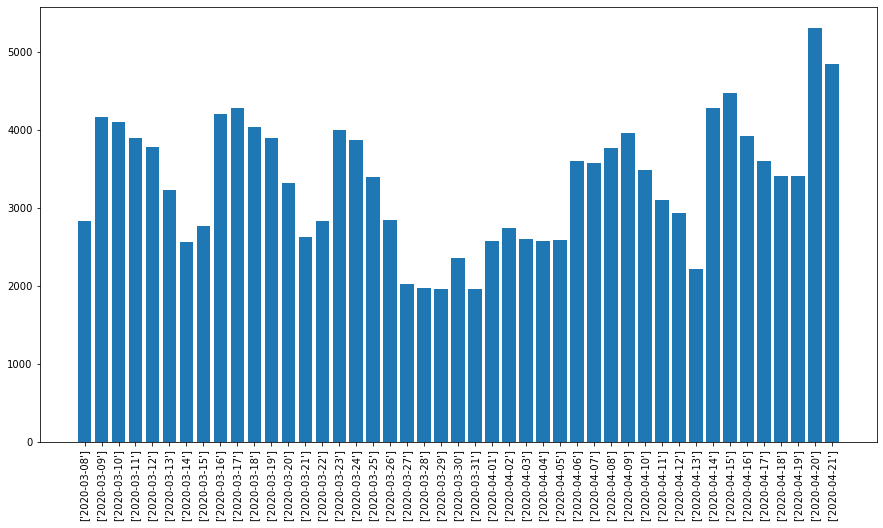

In [6]:
import matplotlib.pyplot as plt

df_dataset['fecha_data'] = df_dataset[['fecha']].apply(lambda row: (str(row[0])[:10]), axis = 1)

bars_heights = df_dataset[['fecha_data']].groupby('fecha_data')['fecha_data'].count()
bars_label = df_dataset[['fecha_data']].groupby('fecha_data')['fecha_data'].unique()

plt.figure(figsize=(15,8))
plt.bar(range(len(bars_label)), bars_heights)
plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
plt.show()

# Coluna fecha por hora

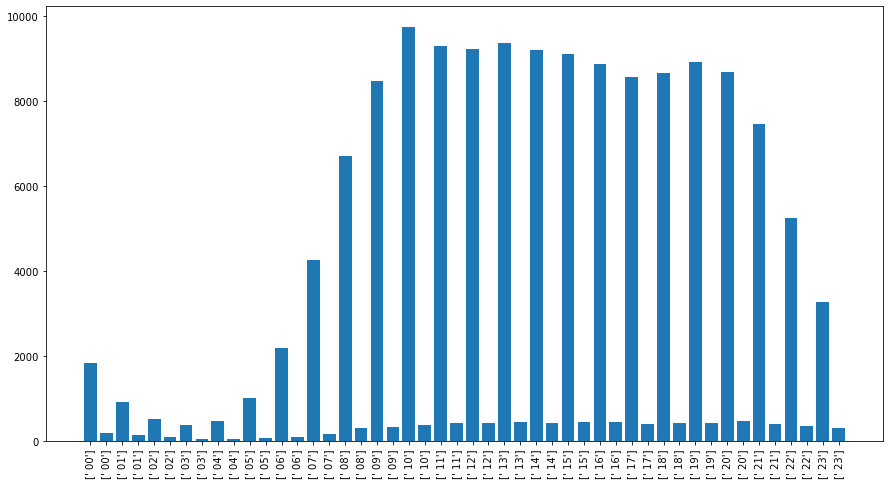

In [7]:
import matplotlib.pyplot as plt

df_dataset['fecha_hora'] = df_dataset[['fecha']].apply(lambda row: (str(row[0])[10:13:]), axis = 1)
bars_heights = df_dataset[['fecha_hora','fraude']].groupby(by=['fecha_hora','fraude'])['fecha_hora'].count()
bars_label = df_dataset[['fecha_hora','fraude']].groupby(by=['fecha_hora','fraude'])['fecha_hora'].unique()

plt.figure(figsize=(15,8))
plt.bar(range(len(bars_label)), bars_heights)
plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
plt.show()

# Coluna fecha por dia da semana

C:\Users\dev01\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


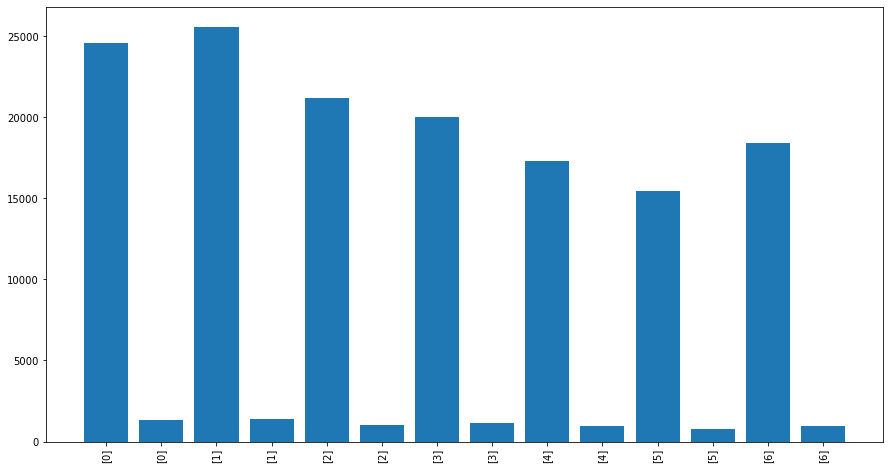

In [8]:
import matplotlib.pyplot as plt
from datetime import datetime

df_dataset['fecha_dia'] = df_dataset[['fecha']].apply(lambda row: (datetime.strptime(str(row[0])[:10], '%Y-%m-%d').weekday()), axis = 1)

bars_heights = df_dataset[['fecha_dia','fraude']].groupby(by=['fecha_dia','fraude'])['fecha_dia'].count()
bars_label = df_dataset[['fecha_dia','fraude']].groupby(by=['fecha_dia','fraude'])['fecha_dia'].unique()

plt.figure(figsize=(15,8))
plt.bar(range(len(bars_label)), bars_heights)
plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
plt.show()

# Features nullas

<AxesSubplot:>

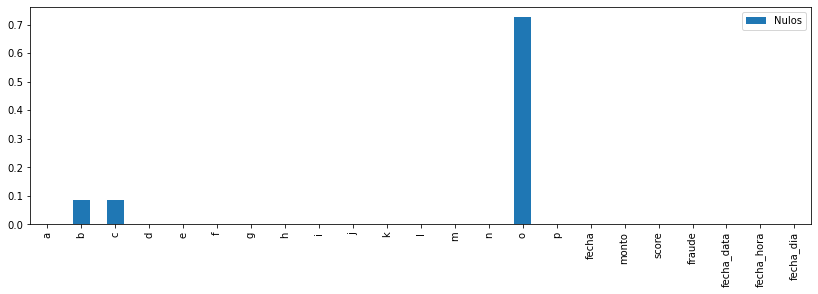

In [9]:
nulos = pd.DataFrame(df_dataset.isna().sum() / df_dataset.isna().count(), columns=['Nulos'])
nulos.plot(kind='bar', figsize=(14,4))

In [10]:
print(df_dataset['o'].unique())
print(df_dataset['b'].min())
print(df_dataset['c'].min())
print(df_dataset['m'].isna().count())
print(df_dataset['l'].isna().count())

df_dataset['o_converted'] = df_dataset['o'].fillna('O')
df_dataset['b_converted'] = df_dataset['b'].fillna(-1)
df_dataset['c_converted'] = df_dataset['c'].fillna(-1)
#df_dataset['m_converted'] = df_dataset['m'].fillna(-1)
#df_dataset['l_converted'] = df_dataset['l'].fillna(-1)

[nan 'Y' 'N']
0.0
0.16
150000
150000


# Selecionar features

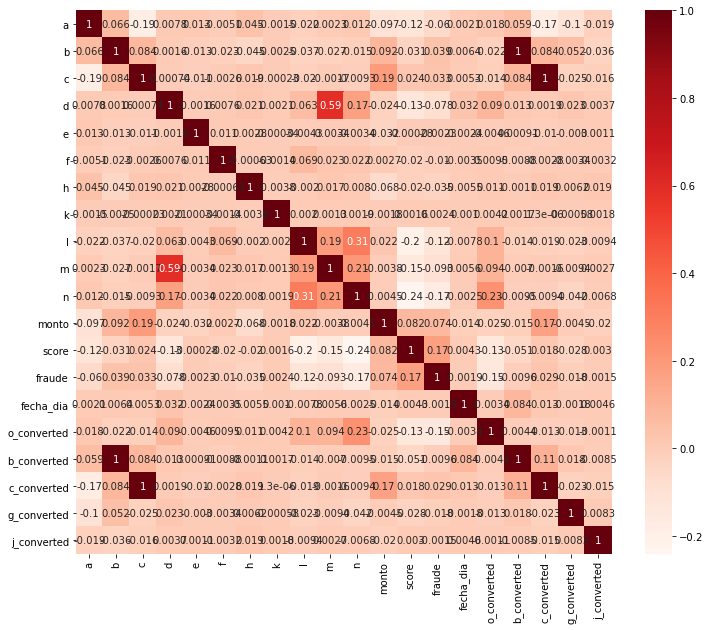

In [11]:
import seaborn as sns
from sklearn import preprocessing

column_g = preprocessing.LabelEncoder()
column_g.fit(df_dataset['g'])
df_dataset['g_converted'] = column_g.transform(df_dataset['g'])

column_g = preprocessing.LabelEncoder()
column_g.fit(df_dataset['j'])
df_dataset['j_converted'] = column_g.transform(df_dataset['j'])

column_g = preprocessing.LabelEncoder()
column_g.fit(df_dataset['o_converted'])
df_dataset['o_converted'] = column_g.transform(df_dataset['o_converted'])

df_dataset = df_dataset.dropna(subset=['m','l'])

plt.figure(figsize=(12,10))
cor = df_dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Selecionar features

<ipython-input-12-0b9298265ef4>:14: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(selected_features.pvalues_)


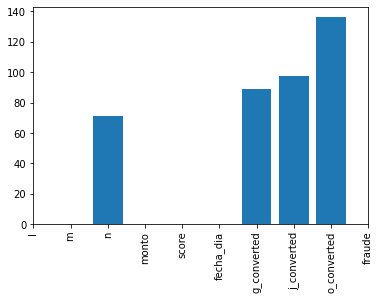

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
import numpy as np

main_features = ['l','m','n','monto','score','fecha_dia','g_converted','j_converted','o_converted','fraude']
df_dataset_filtered = df_dataset[main_features]


X_train, X_test, y_train, y_test = train_test_split(df_dataset_filtered, df_dataset_filtered['fraude'])
feature_select_best = SelectKBest(chi2, k='all')
selected_features = feature_select_best.fit(X_train,y_train)

scores = -np.log10(selected_features.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(main_features)), scores)
plt.xticks(range(len(main_features)), main_features, rotation='vertical')
plt.show()
#importances = pd.Series(data=feature_select_best.feature_importances_, index=feature_select_best.feature_names)
#sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [32]:
from sklearn import tree

features_name = ['n','g_converted','o_converted']
X_train, X_test, y_train, y_test = train_test_split(df_dataset_filtered[features_name], df_dataset_filtered['fraude'])

clf = tree.DecisionTreeClassifier(min_samples_split=2, max_depth=3)
clf = clf.fit(X_train, y_train)

In [34]:
from sklearn import metrics

y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(tree.export_text(clf))

Accuracy: 0.9519608629400914
|--- feature_2 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_1 <= 42.00
|   |   |   |--- class: 0
|   |   |--- feature_1 >  42.00
|   |   |   |--- class: 0
|   |--- feature_0 >  0.50
|   |   |--- feature_1 <= 43.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  43.50
|   |   |   |--- class: 0
|--- feature_2 >  0.50
|   |--- feature_2 <= 1.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 0
|   |--- feature_2 >  1.50
|   |   |--- feature_1 <= 5.00
|   |   |   |--- class: 0
|   |   |--- feature_1 >  5.00
|   |   |   |--- class: 0



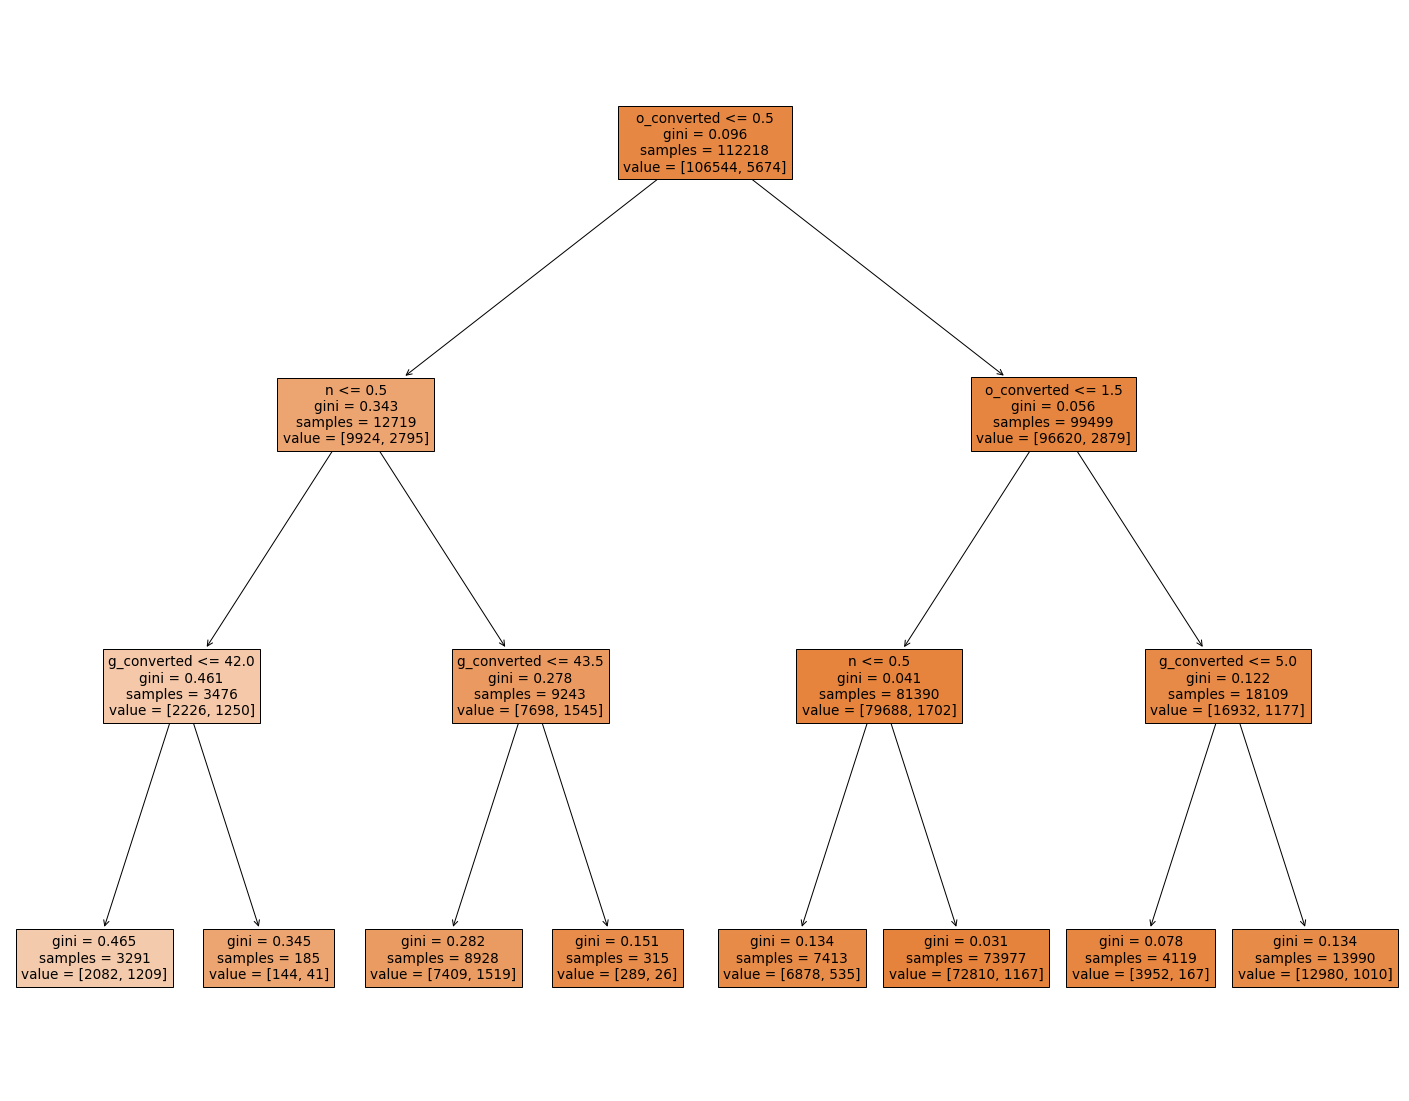

In [33]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=features_name, filled=True)